Three Observable Trends
------------------------------------
    1.)
    2.)
    3.)

In [1]:
#dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from scipy import stats

#import api key
from config import weather_api_key

#incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output file (csv)
output_data_file = "output_data/cities.csv"

#range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)
lat_range = (-10, 4)
lng_range = (1, 2)

#formatting for bold text
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [2]:
#printing out the minneapolis json to see the data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "minneapolis").json()
response

{'coord': {'lon': -93.26, 'lat': 44.98},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 29.25,
  'feels_like': 21.76,
  'temp_min': 28,
  'temp_max': 30.99,
  'pressure': 1017,
  'humidity': 92},
 'visibility': 16093,
 'wind': {'speed': 5.82, 'deg': 360},
 'clouds': {'all': 90},
 'dt': 1579881822,
 'sys': {'type': 1,
  'id': 5829,
  'country': 'US',
  'sunrise': 1579873284,
  'sunset': 1579907302},
 'timezone': -21600,
 'id': 5037649,
 'name': 'Minneapolis',
 'cod': 200}

In [3]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low=-10.000, high=4.000, size=1500)
lngs = np.random.uniform(low=1.000, high=2.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add a one second interval between queries to stay within API query limits
time.sleep(1)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

9

In [4]:
#Perform API Calls
#write something more descriptive...

#base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_info = []

#in order to print the print log according to how the homework looks (change comment before final draft)
i = 1
set_number = 1

print("Beginning Data Retrieval") 
print("--------------------------------")

for j, city in enumerate(cities):
    
    if (j % 50 == 0 and j >= 50):
        set_number = set_number + 1
        i = 0
    print(f"Processing Record {i} of Set {set_number} | {city}")
    i=i+1
   
    response = requests.get(query_url + city).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    try:
        lat = response['coord']['lat']
        name = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lngs = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        city_info.append({"City": name,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": lat,
                          "Lng": lngs,
                          "Max Temp": max_temp,
                          "Wind Speed": wind_speed})
    except:
        print("City " + color.BOLD + "not " + color.END + "found. Skipping...")
        pass

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | winneba
Processing Record 3 of Set 1 | mumford
Processing Record 4 of Set 1 | port-gentil
Processing Record 5 of Set 1 | omboue
Processing Record 6 of Set 1 | anloga
Processing Record 7 of Set 1 | takoradi
Processing Record 8 of Set 1 | gamba
Processing Record 9 of Set 1 | teshie
------------------------
Data Retrieval Complete
------------------------


In [5]:
#export the city data into a csv
#display the dataframe

city_df = pd.DataFrame(city_info)

city_df.to_csv('cities.csv', encoding="utf-8", index_label="City_ID")

city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,90,US,1579882002,40,42.10,-79.24,43.00,10.29
1,Winneba,0,GH,1579882001,62,5.35,-0.62,89.60,10.29
2,Mumford,0,GH,1579881998,38,5.26,-0.76,95.05,11.54
3,Port-Gentil,40,GA,1579881886,70,-0.72,8.78,91.40,10.29
4,Omboue,94,GA,1579882003,70,-1.57,9.26,85.96,4.74
5,Anloga,15,GH,1579882000,46,5.79,0.90,91.40,10.29
6,Takoradze,0,GH,1579881894,52,4.88,-1.76,91.38,10.98
7,Gamba,69,GA,1579881996,74,-2.65,10.00,83.91,8.52
8,Teshie,0,GH,1579882184,62,5.58,-0.11,89.60,10.29


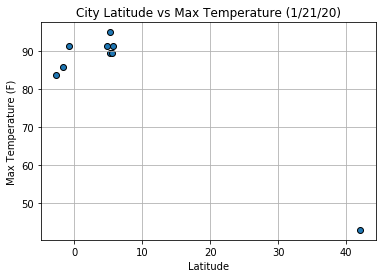

In [6]:
#plot latitude v temperature
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Max Temperature (1/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Temp_v_Latitude.png"))

#for reference on setting limits:
#plt.xlim(-50, 35)
#plt.ylim(20, 100)

**CODE:**  This code is utilizing www.openweathermap.org to gather data on cities around the globe.  We specifically called for info on city name, latitudes, longitudes, cloudiness, humidity, wind speed, country and date.  For the above scatter plot, we looked at max temperature versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

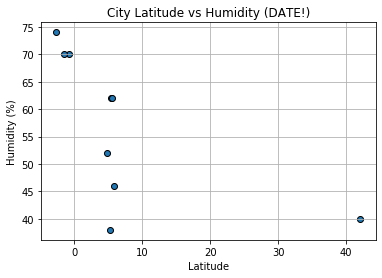

In [7]:
#plot latitude v humidity
x_values = city_df["Lat"]
y_values = city_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Humidity (DATE!)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Humidity_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at humidity relative to city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

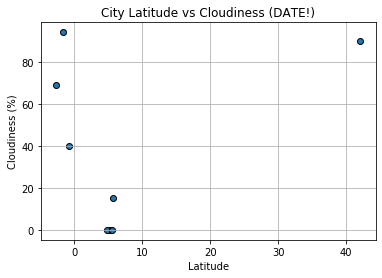

In [8]:
#plot latitude v cloudiness
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Cloudiness (DATE!)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Cloudiness_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at cloudiness versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

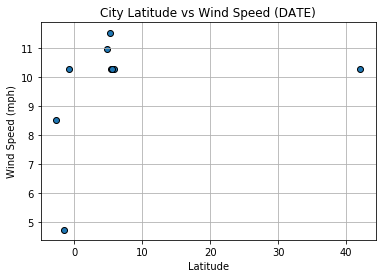

In [9]:
#plot latitude v wind speed
x_values = city_df["Lat"]
y_values = city_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Wind Speed (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Wind_Speed_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at wind speed versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

In [10]:
#run linear regressions on the above relationships, by hemisphere
#max temp (F) v latitude
#humidity (%) v latitude
#cloudiness (%) v latitude
#wind speed (mph) v latitude

In [11]:
#create northern hemisphere dataframe

#logic test/conditional statement returns a series of boolean values; make sure on the right track
northern_hem = city_df["Lat"] >= 0

#locate where the 'Lat' values are >= 0; reset index for cleaner formatting
northern_df = city_df.loc[city_df["Lat"] >= 0, :].reset_index()

#get rid of newly created 'index' column resulting from above code
northern_df = northern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,90,US,1579882002,40,42.10,-79.24,43.00,10.29
1,Winneba,0,GH,1579882001,62,5.35,-0.62,89.60,10.29
2,Mumford,0,GH,1579881998,38,5.26,-0.76,95.05,11.54
3,Anloga,15,GH,1579882000,46,5.79,0.90,91.40,10.29
4,Takoradze,0,GH,1579881894,52,4.88,-1.76,91.38,10.98
5,Teshie,0,GH,1579882184,62,5.58,-0.11,89.60,10.29


In [12]:
#create southern hemisphere dataframe

#logic test for my own knowledge; not necessarily needed to create the dataframe
southern_hem = city_df["Lat"] < 0

#create southern hemisphere dataframe
southern_df = city_df.loc[city_df["Lat"] < 0, :].reset_index()
southern_df = southern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port-Gentil,40,GA,1579881886,70,-0.72,8.78,91.40,10.29
1,Omboue,94,GA,1579882003,70,-1.57,9.26,85.96,4.74
2,Gamba,69,GA,1579881996,74,-2.65,10.00,83.91,8.52


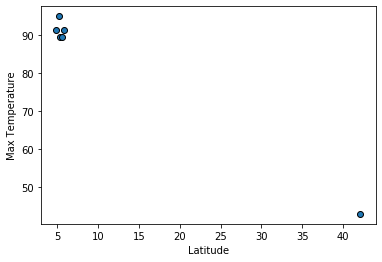

In [13]:
#run linear regression on max temp v latitude (northern hemisphere)

#first create scatter plot
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig("Images/test.png")

In [14]:
#perform a linear regression on temp v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    42.996999
1    91.435597
2    91.554223
3    90.855652
4    92.055084
5    91.132444
Name: Lat, dtype: float64


In [15]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.32x +98.49


The r-squared is: -0.995250805526986


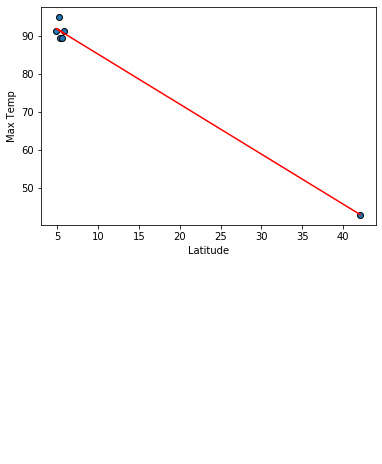

In [16]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(8,-20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")



#save plot to images folder
plt.savefig(os.path.join("Images","Northern_Temp_v_Latitude.png"))

# Show plot
plt.show()

Text(0, 0.5, 'Max Temperature')

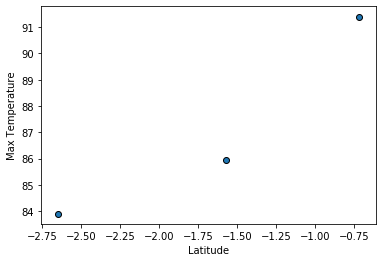

In [17]:
#run linear regression on max temp v lat (southern hemisphere)

#create scatter plot
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

In [18]:
#perform a linear regression on temp v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    90.604939
1    87.380804
2    83.284257
Name: Lat, dtype: float64


In [19]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 3.79x +93.34


The r-squared is: 0.9478770232785518


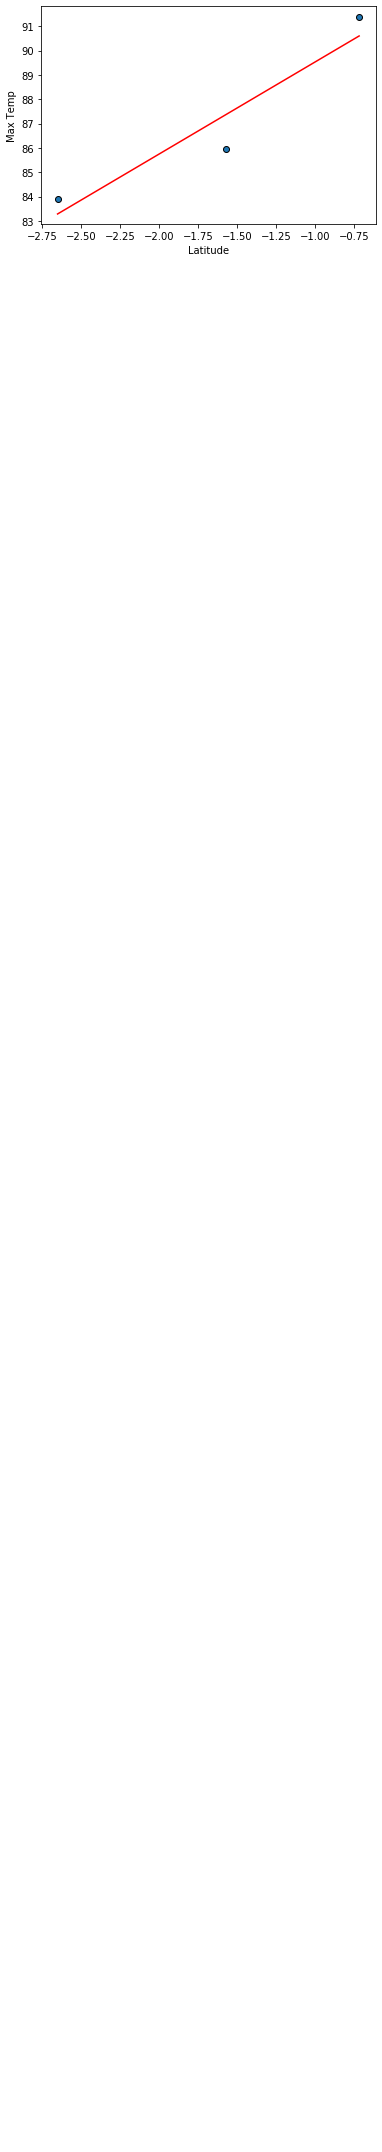

In [20]:
#create plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-2,4),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")



#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Southern_Temp_v_Latitude.png"))
plt.show()

**ANALYSIS:**
**_Max Temp v Latitude_**     
The linear regressions for both hemispheres follow what common sense would dictate.  As you approach the equator, heading south, the max temperatures increase.  Similary, approaching the equator heading north, the max temps increase.  For both hemispheres, the farther distance a location is from the equator, the colder the max temperature.  The reason that the linear regressions have opposite-signed slopes is due to the nature of the latitude coordinates (ie North Pole is at 90 degrees, South Pole is at -90 degrees).  Finally, our r-values do indicate there is a correlation.  

Text(0, 0.5, 'Humidity')

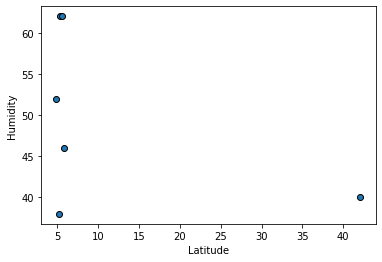

In [21]:
#run linear regression on humidity v lat (northern hemisphere)

#create scatter plot
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [22]:
#perform a linear regression on humidity v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    40.029245
1    52.001318
2    52.030637
3    51.857979
4    52.154430
5    51.926391
Name: Lat, dtype: float64


In [23]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.33x +53.74


The r-squared is: -0.46498665489645014


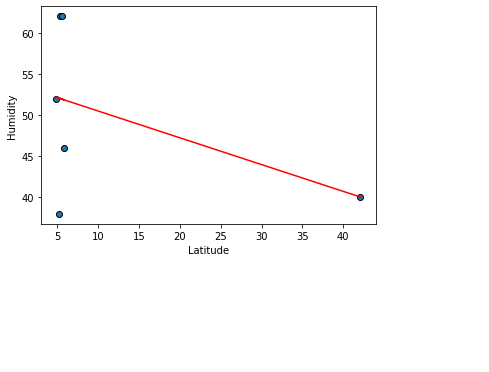

In [24]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")



#save plot to images folder
plt.savefig(os.path.join("Images","Northern_Humidity_v_Latitude.png"))

# Show plot
plt.show()

Text(0, 0.5, 'Humidity')

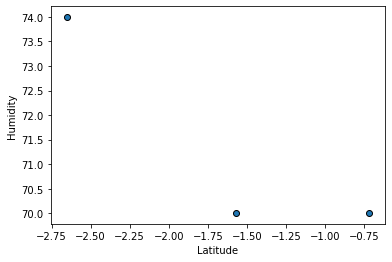

In [25]:
#plot linear regression on humidity v lat (southern hemisphere)

#create scatter plot
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [26]:
#perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    69.345898
1    71.168905
2    73.485197
Name: Lat, dtype: float64


In [27]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -2.14x +67.8


The r-squared is: -0.8983033714938208


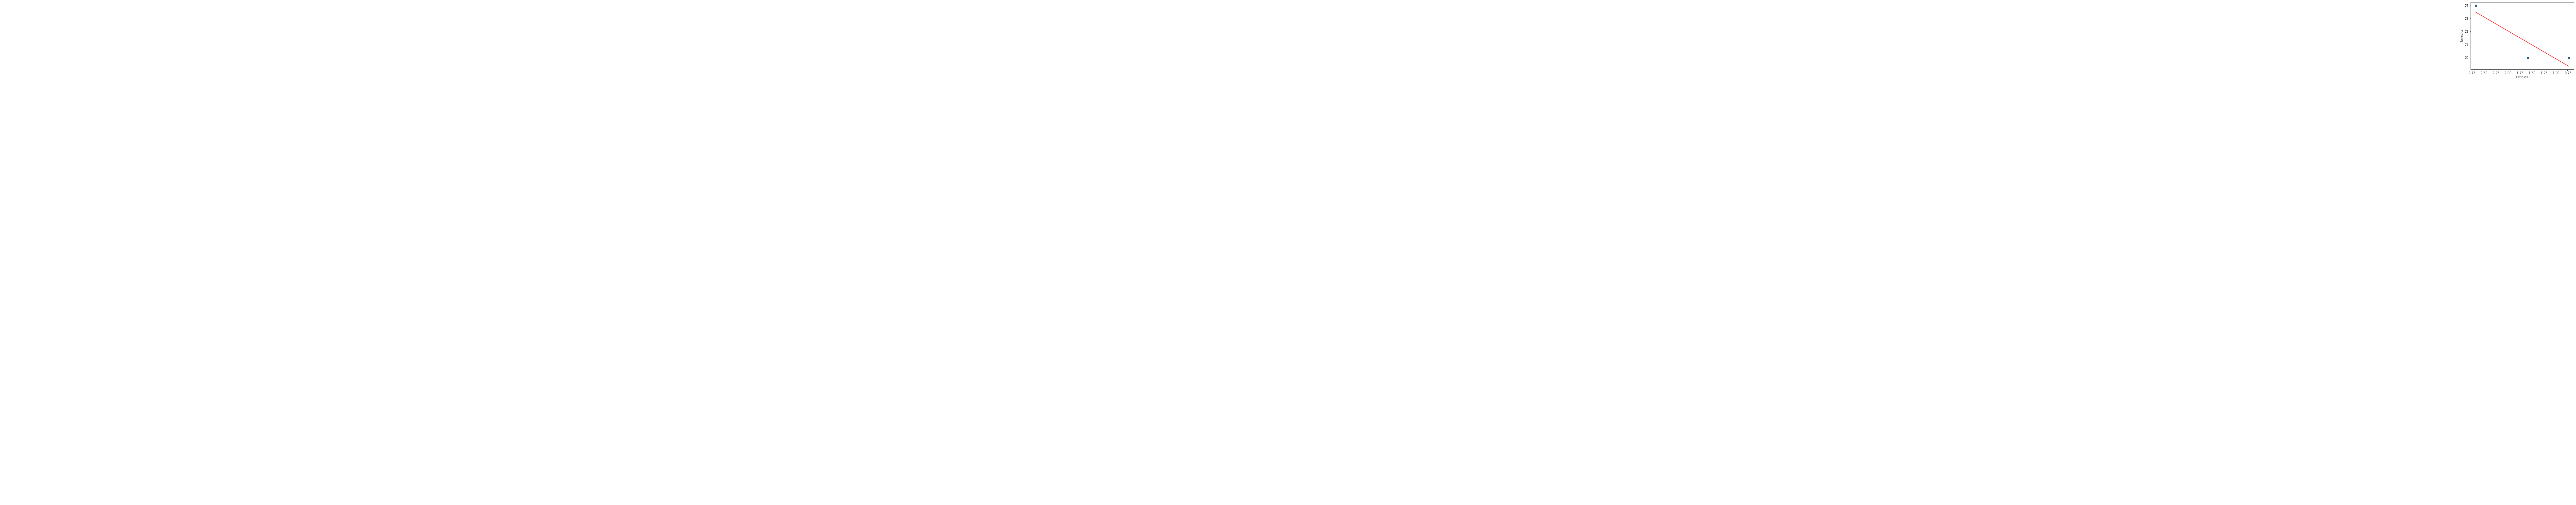

In [28]:
#create plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-54,36),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")



#save to Images Folder
plt.savefig(os.path.join("Images","Southern_Humidity_v_Latitude.png"))

# Show plot
plt.show()

**ANALYSIS:**
**_Humidity v Latitude_**     
The r-values are low, indicating there is not a strong correlation between humidity latitude.  Perhaps there would be a stronger correlation if we narrowed down latitude and added in longitutde.  But across the entirety of the globe, our r-value indicates there is not a strong correlation.

Text(0, 0.5, 'Cloudiness')

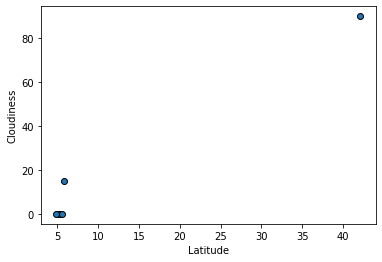

In [29]:
#plot cloudiness v lat linear regression (northern hemisphere)

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [30]:
#perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    90.140144
1     2.919758
2     2.706157
3     3.964029
4     1.804286
5     3.465627
Name: Lat, dtype: float64


In [31]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 2.37x +-9.78


The r-squared is: 0.9881434620709285


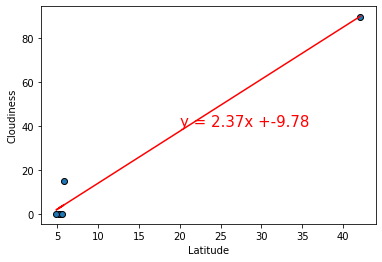

In [32]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")




#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Northern_Cloudiness_v_Latitude.png"))

# Show plot
plt.show()

Text(0, 0.5, 'Cloudiness')

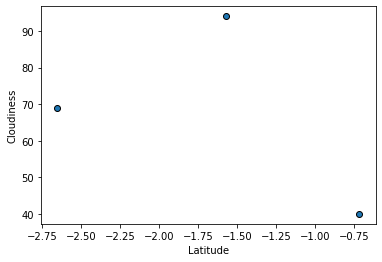

In [33]:
#plot cloudiness v lat linear regression (southern hemisphere)

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [34]:
#perform a linear regression on cloudiness v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    55.30792
1    66.64418
2    81.04790
Name: Lat, dtype: float64


In [35]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -13.34x +45.71


The r-squared is: -0.47735687134124777


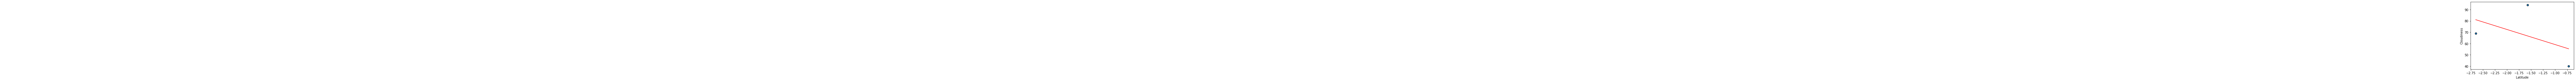

In [36]:
#create Plot
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-54,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")



#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Southern_Cloudiness_v_Latitude.png"))

# Show plot
plt.show()

**ANALYSIS:**
**_Cloudiness v Latitude_**     
Similar to humidity v latitude, our r-values are low for both hemispheres when charting humidity v latitude.  Again, my guess is we could correlate cloudiness with other markers, just not latitude (alone).

Text(0, 0.5, 'Wind Speed')

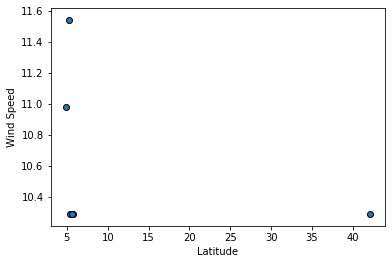

In [37]:
#plot wind speed v lat linear regression (northern hemisphere)

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [38]:
#perform a linear regression on wind speed v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    10.277087
1    10.680824
2    10.681813
3    10.675991
4    10.685988
5    10.678298
Name: Lat, dtype: float64


In [39]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.01x +10.74


The r-squared is: -0.31011676198855503


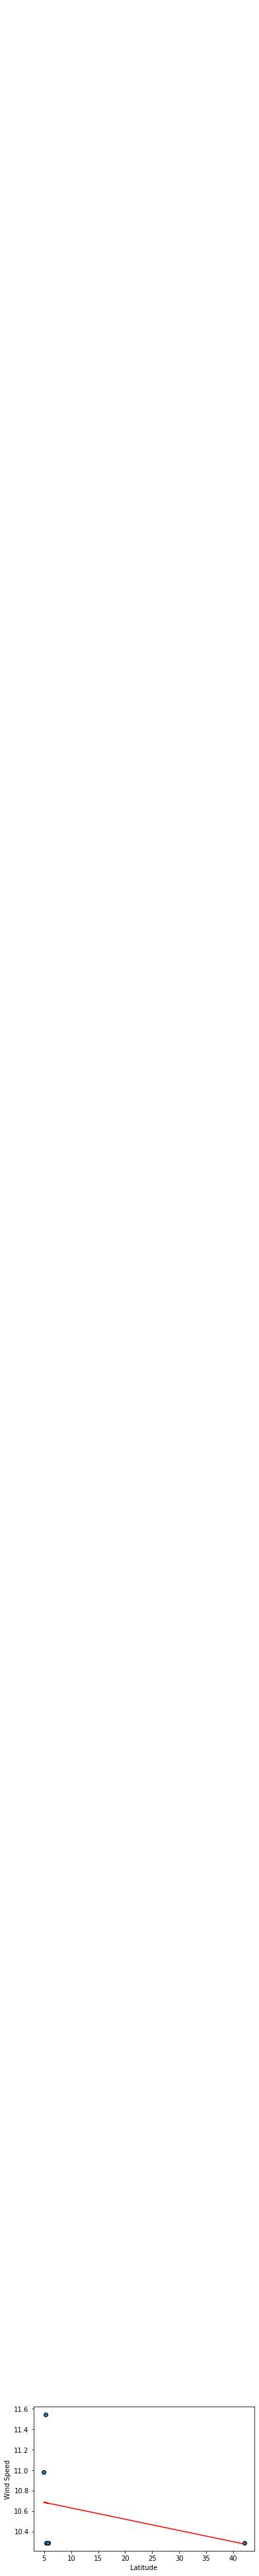

In [40]:
#create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,35),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")



#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Northern_WindSpeed_v_Latitude.png"))

# Show plot
plt.show()

Text(0, 0.5, 'Wind Speed')

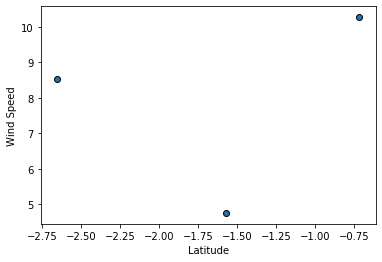

In [41]:
#plot wind speed v lat linear regression (southern hemisphere)

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [42]:
#perform a linear regression on wind speed v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    8.518729
1    7.905327
2    7.125944
Name: Lat, dtype: float64


In [43]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.72x +9.04


The r-squared is: 0.24622066570287116


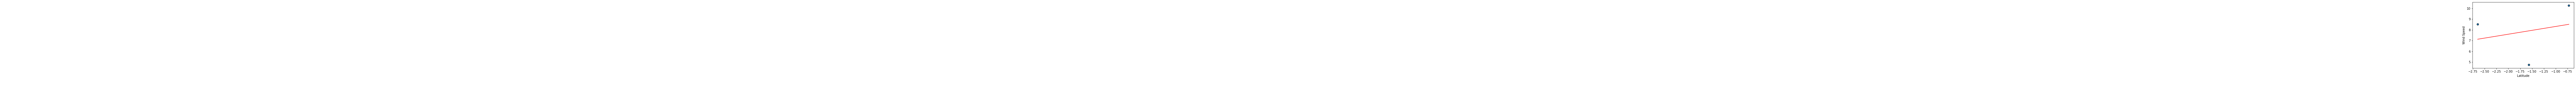

In [44]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-55,1),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")



#save scatter plot to images folder
plt.savefig(os.path.join("Images","Southern_WindSpeed_v_Latitude.png"))

# Show plot
plt.show()

**ANALYSIS:**
**_Wind Speed v Latitude_**     
Yet again, we have low r-values, indicating a weak correlation between wind speed and latitude, across both hemispheres.  When looking at the relationships we've analyzed, the strongest correlation appears between temperature and latitude.
